In [1]:
#Ziming Dong

In [3]:
#CSE 572 Assignment2
#train.py or train.m - should return a trained ML model in .pickle format
import matplotlib.pyplot as plt
import pandas as pd
import os,glob
import warnings
import numpy as np
import seaborn
from scipy.fftpack import fft,ifft
from scipy.stats import kurtosis,skew
from sklearn.decomposition import PCA
from numpy import linalg as LA
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import pickle
import csv

#Save the csv files data into list for meal and nomeal data.
meal=[]
nomeal=[]
for i in range (5):
    with open(r'mealData'+str(i+1)+'.csv','rt')as mealfile:
        data = csv.reader(mealfile)
        for row in data:
            meal.append(row)
    with open(r'Nomeal'+str(i+1)+'.csv','rt')as nomealfile:
        data = csv.reader(nomealfile)
        for row in data:
            nomeal.append(row)

#Print the length of meal and nomeal list
print (len(meal))
print (len(nomeal))

255
255


In [4]:
#Implement a function to clean the data, get ride of Nan and keep first 30 element for each row
def clean(data):
    x = []
    for i in range (len(data)):
        data[i] = data[i][::-1]
        data[i] = data[i][:30]
        if (len(data[i])!= 30):
            x.append(i)
        elif 'NaN' in data[i]:
            x.append(i)      
    for j in range (len(x),0,-1):
        del data[x[j-1]]
    return data            

# Clean the data
Meal=clean(meal)
Nomeal=clean(nomeal)

print(len(Meal))

print (len(Nomeal))

216
219


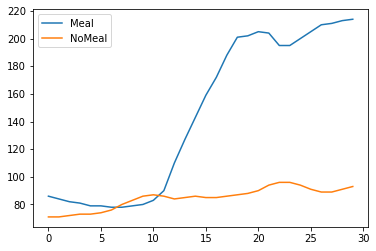

(435,)
(435, 4)
(435,)
(435, 7)
(435, 6)
(435,)
Accuracy for each iteration:
0.6551724137931034
              precision    recall  f1-score   support

         0.0       0.61      0.64      0.62        39
         1.0       0.70      0.67      0.68        48

    accuracy                           0.66        87
   macro avg       0.65      0.65      0.65        87
weighted avg       0.66      0.66      0.66        87

Accuracy for each iteration:
0.5977011494252874
              precision    recall  f1-score   support

         0.0       0.59      0.60      0.60        43
         1.0       0.60      0.59      0.60        44

    accuracy                           0.60        87
   macro avg       0.60      0.60      0.60        87
weighted avg       0.60      0.60      0.60        87

Accuracy for each iteration:
0.6091954022988506
              precision    recall  f1-score   support

         0.0       0.65      0.65      0.65        49
         1.0       0.55      0.55      0.55  

In [6]:
#Plot the simple graph for meal and nomeal data
x=np.arange(30)
meal_array=np.asarray(Meal[2],dtype=int)
nomeal_array=np.asarray(Nomeal[2],dtype=int)
plt.figure(0)
plt.plot(x,meal_array,label="Meal")
plt.plot(x,nomeal_array,label="NoMeal")
plt.legend()
plt.show()

#Transfer list to array for meal and nomeal data
dfmeal = pd.DataFrame(Meal) 
dfnomeal = pd.DataFrame(Nomeal)

dfmeal=dfmeal.dropna()
dfnomeal=dfnomeal.dropna()

#FFT feature for meal
fft_meal_total=[]
fft_meal_norm=[]
for i in range(0,216):
    x=np.linspace(0,29,30)
    y=dfmeal.iloc[i]
    yy=abs(fft(y))              
    yy1=np.delete(yy,0)
    yy2=np.unique(yy1)
    Max5=np.partition(yy2,-4)[-4:]
    normMax5=Max5/Max5.max(axis=0)
    fft_meal_total.append(Max5)
    fft_meal_norm.append(normMax5)
#print value of FFT    
#fft_meal_total

#FFT feature for no meal
fft_nomeal_total=[]
fft_nomeal_norm=[]
for i in range(0,219):
    x=np.linspace(0,29,30)
    y=dfnomeal.iloc[i]
    yy=abs(fft(y))              
    yy1=np.delete(yy,0)
    yy2=np.unique(yy1)
    Max5=np.partition(yy2,-4)[-4:]
    normMax5=Max5/Max5.max(axis=0)
    fft_nomeal_total.append(Max5)
    fft_nomeal_norm.append(normMax5)
#print value of FFT    

#fft_nomeal_total

#Interquartile range feature for meal
q_meal_total=[]
for i in range(0,216):
    q=np.asarray(dfmeal.iloc[i],dtype=np.float32)
    q1_x=np.quantile(q,0.25,interpolation='midpoint')
    q3_x=np.quantile(q,0.75,interpolation='midpoint')
    q4=np.array(q3_x-q1_x)
    q_meal_total.append(q4)
#Print value of interquartile range
#q_meal_total

#Interquartile range feature for no meal
q_nomeal_total=[]
for i in range(0,219):
    q=np.asarray(dfnomeal.iloc[i],dtype=np.float32)
    q1_x=np.quantile(q,0.25,interpolation='midpoint')
    q3_x=np.quantile(q,0.75,interpolation='midpoint')
    q4=np.array(q3_x-q1_x)
    q_nomeal_total.append(q4)
#Print value of interquartile range
#print(len(q_nomeal_total))

#Combine interquartile feature (meal and nomeal) together as feautre matrix
feature_q=np.concatenate((q_meal_total,q_nomeal_total),axis=0)

#skewness feature for meal
s_meal_total=[]
for i in range(0,216):
    s1=np.asarray(dfmeal.iloc[i],dtype=np.float32)
    s2=np.array(skew(s1))
    s_meal_total.append(s2)
#Print value of skewness

#skewness feature for no meal
s_nomeal_total=[]
for i in range(0,219):
    s1=np.asarray(dfnomeal.iloc[i],dtype=np.float32)
    s2=np.array(skew(s1))
    s_nomeal_total.append(s2)
#Print value of skewness

#Combine fft feature and skewness feature for meal and no meal data
feature_s=np.concatenate((s_meal_total,s_nomeal_total),axis=0)
print(feature_s.shape)
feature_f=np.vstack((fft_meal_total,fft_nomeal_total))
print(feature_f.shape)

#combine all feature together as feature matrix
feature=np.column_stack((feature_f,feature_q))
feature=np.column_stack((feature,feature_s))

#Set up label set, 1 for meal 0 for nomeal
meal_label=np.ones(len(Meal))
nomeal_label=np.zeros(len(Nomeal))
label=np.hstack((meal_label,nomeal_label))

print (label.shape)

#Combine feature matrix and label togehter
combine=np.column_stack([feature,label])
print (combine.shape)

#print (combine)

#Radnom shuffle the feature matrix
np.random.shuffle(combine)
#Set up the feature set and label set
for i in range (len(combine)):
    if i==0:
        feature = combine[i][:6]
        label = combine[i][6]
    else:
        feature = np.vstack((feature,combine[i][:6]))
        label = np.hstack((label, combine[i][6]))
print (feature.shape)
print(label.shape)

#Use train set and label set to train the machine.
train_set=feature
label_set=label
classfy = svm.SVC(kernel='linear',gamma='scale',degree=3,C=10).fit(train_set, label_set)
pickle.dump(classfy, open('model.pickle', 'wb'))#return a trained ML model in .pickle format

#Use k fold cross validation on the training data to evaluate your recognition system
KFsplit=KFold(n_splits=5)
KFsplit.get_n_splits(feature)
for train_index,test_index in KFsplit.split(feature):
    X_train, X_test = feature[train_index], feature[test_index]
    y_train, y_test = label[train_index], label[test_index]
    classfy = svm.SVC(kernel='linear',gamma='scale',degree=3,C=10).fit(X_train, y_train)
    print("Accuracy for each iteration:")
    print(classfy.score(X_test,y_test))
    p = classfy.predict(X_test)
    print(classification_report(y_test,p))